# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


## 1. What test is appropriate for this problem? Does CLT apply?
Since problem statement ask for the comparison between two categories, the bootstrap mean difference between the two can be applied in the bootstrap approach. On the other hand, since n very large, the bernoulli distribution approaches a normal distribution. CLT would apply to the problem since CLT does not discriminate the type of distribution. It only says that if many samples are taken from a distribution, the resulting distribution would resemble a normal distribution and thus would have all the properties of a normal distribution.


## 2. What are the null and alternate hypotheses?
Ho = rate of callback for white candidates = rate of callback for black candidates
<br>Ha = rate of callback for white candidates > rate of callback for black candidates
alpha = 0.05

Since the problem statement is related to racial discrimination, I assumed the discrimination is against black candidates. This perspective lead me to believe the most appropriate alternative hypotheses is rate of callback for white candidates is greater than that of black candidates

In [5]:
w = data[data.race=='w']
b = data[data.race=='b']

## 3. Compute margin of error, confidence interval, and p-value

In [37]:
#isolate only the race and callback columns. Then merge the df
w = w.loc[:, ['race', 'call']]
b = data.loc[:, ['race', 'call']]
combined_df = pd.concat([w, b], ignore_index = True)

(7305, 2)

In [67]:
#bootstrap permutation approach
inx = np.arange(len(combined_df))
mean_w = np.mean(w.call)
mean_b = np.mean(b.call)
diff = mean_w - mean_b
store_perm = np.empty(10000)
for i in range(10000):
    indx_perm = np.random.choice(inx, size = len(combined_df))
    boot = combined_df.iloc[indx_perm]
    boot_mean_w = np.mean(boot[boot['race'] == 'w'].call)
    boot_mean_b = np.mean(boot[boot['race'] == 'b'].call)
    diff_mean = boot_mean_w - boot_mean_b
    store_perm[i] = diff_mean

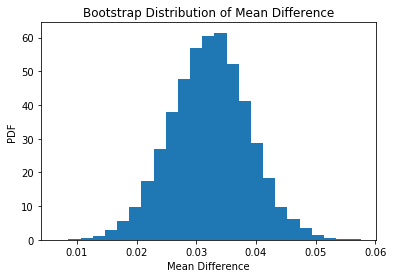

In [98]:
#plot the histogram of the bootstrap mean difference
_ = plt.hist(store_perm, bins = 25, normed = True)
plt.xlabel('Mean Difference')
plt.ylabel('PDF')
plt.title('Bootstrap Distribution of Mean Difference')

In [78]:
MOE = 1.96*np.std(store_perm)
print('The margin of error for the mean difference distribution is ' + str(round(MOE, 5)))

The margin of error for the mean difference distribution is 0.01275


In [79]:
lower = np.mean(store_perm) - MOE
upper = np.mean(store_perm) + MOE
print('The 95% confidence interval of the mean difference is between ' + 
      str(round(lower, 3)) + ' and ' + str(round(upper, 3)))

The 95% confidence interval of the mean difference is between 0.019 and 0.045


In [99]:
p_value = np.sum(store_perm <= diff)/len(store_perm)
print('The p-value is found to be ' + str(p_value))

The p-value is found to be 0.0071


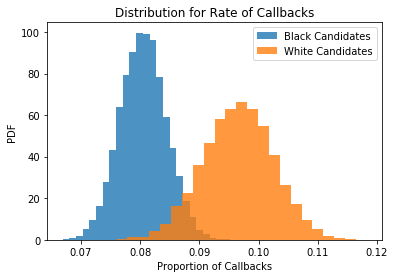

In [117]:
#frequentist approach
b_mean = np.mean(b.call)
w_mean = np.mean(w.call)
b_std = np.sqrt(b_mean*(1-b_mean)/len(b))
w_std = np.sqrt(w_mean*(1-w_mean)/len(w))
b_norm = np.random.normal(b_mean, b_std, 10000)
w_norm = np.random.normal(w_mean, w_std, 10000)

_ = plt.hist(b_norm, normed = True, bins = 25, alpha = 0.8)
_ = plt.hist(w_norm, normed = True, bins = 25, alpha = 0.8)
plt.xlabel('Proportion of Callbacks')
plt.ylabel('PDF')
plt.title('Distribution for Rate of Callbacks')
plt.legend(('Black Candidates', 'White Candidates'), loc = 'upper right')

In [120]:
#confidence interval of the white candidate normal distribution
LowerCI_w = w_mean - 1.96*w_std
UpperCI_w = w_mean + 1.96*w_std
MOE_w = 1.96*w_std
print('The 95% confidence interval of the white candidate population is between ' + 
      str(round(LowerCI_w, 3)) + ' and ' + str(round(UpperCI_w, 3)) + 
     ' with a margin of error of ' + str(round(MOE_w, 3)))

The 95% confidence interval of the white candidate population is between 0.085 and 0.108 with a margin of error of 0.012


In [121]:
#confidence interval of the black candidate normal distribution
LowerCI_b = b_mean - 1.96*b_std
UpperCI_b = b_mean + 1.96*b_std
MOE_b = 1.96*b_std
print('The 95% confidence interval of the white candidate population is between ' + 
      str(round(LowerCI_b, 3)) + ' and ' + str(round(UpperCI_b, 3)) + 
     ' with a margin of error of ' + str(round(MOE_b, 3)))

The 95% confidence interval of the white candidate population is between 0.073 and 0.088 with a margin of error of 0.008


In [122]:
#p-value of the proportion
pc = (w_mean*len(w)+b_mean*len(b))/(len(b)+len(w))
z_value = (w_mean - b_mean)/np.sqrt(pc*(1-pc)/len(b) + pc*(1-pc)/len(w))
p_value = 1 - stats.norm.cdf(z_value)
print('The p-value evaluated from frequentist approach is ' +
     str(round(p_value, 4)))

The p-value evaluated from frequentist approach is 0.0106


## 4. Write a story describing the statistical significance in the context or the original problem.
With p-value of 0.0071 from bootstrap permutation, we reject the null hypothesis and accept the alternative hypothesis that there is statistical evidence that race plays a role in call back rates.

With p-value of 0.0106 from frequentist approach, we reject the null hypothesis and accept the alternative hypothesis that there is statistical evidence that race plays a role in call back rates.

## 5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?
Since the analysis was focus on only race, a comprehensive study of the other features were not included in the study. Factors such as education, years of experience and other features needs assessment to compute callback sucess factors. A logistics regression study could be done on different features and study the correlations to gain a deeper understanding of factors companies seek to callback candidates.